### Test Set Preprocessing

In this milestone, you will go beyond the descriptive statistics you completed in the last milestone. This milestone is really about diving deeper to analyze your data, beyond descriptive stats. Maybe you need to analyze qualitative data or textual data to get a full picture.

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|amount_tsh | Total static head (amount water available to waterpoint)	|
|date_recorded |The date the row was entered	|
|funder |Who funded the well	|
|gps_height |Altitude of the well	|
|installer |Organization that installed the well	|
|longitude |GPS coordinate	|
|latitude |GPS coordinate	|
|wpt_name |Name of the waterpoint if there is one	|
|num_private |	|
|basin |Geographic water basin	|
|subvillage |Geographic location	|
|region |Geographic location	|
|region_code | Geographic location (coded)	|
|district_code |Geographic location (coded)	|
|lga |Geographic location	|
|ward |Geographic location	|
|population |Population around the well	|
|public_meeting |True/False	|
|recorded_by |Group entering this row of data	|
|scheme_management |Who operates the waterpoint	|
|scheme_name |Who operates the waterpoint	|
|permit | If the waterpoint is permitted	|
|construction_year |Year the waterpoint was constructed	|
|extraction_type |The kind of extraction the waterpoint uses	|
|extraction_type_group |The kind of extraction the waterpoint uses	|
|extraction_type_class |The kind of extraction the waterpoint uses	|
|management |How the waterpoint is managed	|
|management_group |How the waterpoint is managed	|
|payment |What the water costs	|
|payment_type |What the water costs	|
|water_quality |The quality of the water	|
|quality_group |The quality of the water	|
|quantity |The quantity of water	|
|quantity_group |The quantity of water	|
|source |The source of the water	|
|source_type |The source of the water	|
|source_class |The source of the water	|
|waterpoint_type |The kind of waterpoint	|
|waterpoint_type_group |The kind of waterpoint	|
|functional |the waterpoint is operational and there are no repairs needed	|
|non functional | the waterpoint is not operational |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("test.csv",parse_dates=['date_recorded'])

In [3]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     14850 non-null  int64         
 1   amount_tsh             14850 non-null  float64       
 2   date_recorded          14850 non-null  datetime64[ns]
 3   funder                 13981 non-null  object        
 4   gps_height             14850 non-null  int64         
 5   installer              13973 non-null  object        
 6   longitude              14850 non-null  float64       
 7   latitude               14850 non-null  float64       
 8   wpt_name               14850 non-null  object        
 9   num_private            14850 non-null  int64         
 10  basin                  14850 non-null  object        
 11  subvillage             14751 non-null  object        
 12  region                 14850 non-null  object        
 13  r

In [5]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [6]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group'], dtype='object')

### Data Visualization

### Univariate Data Exploration

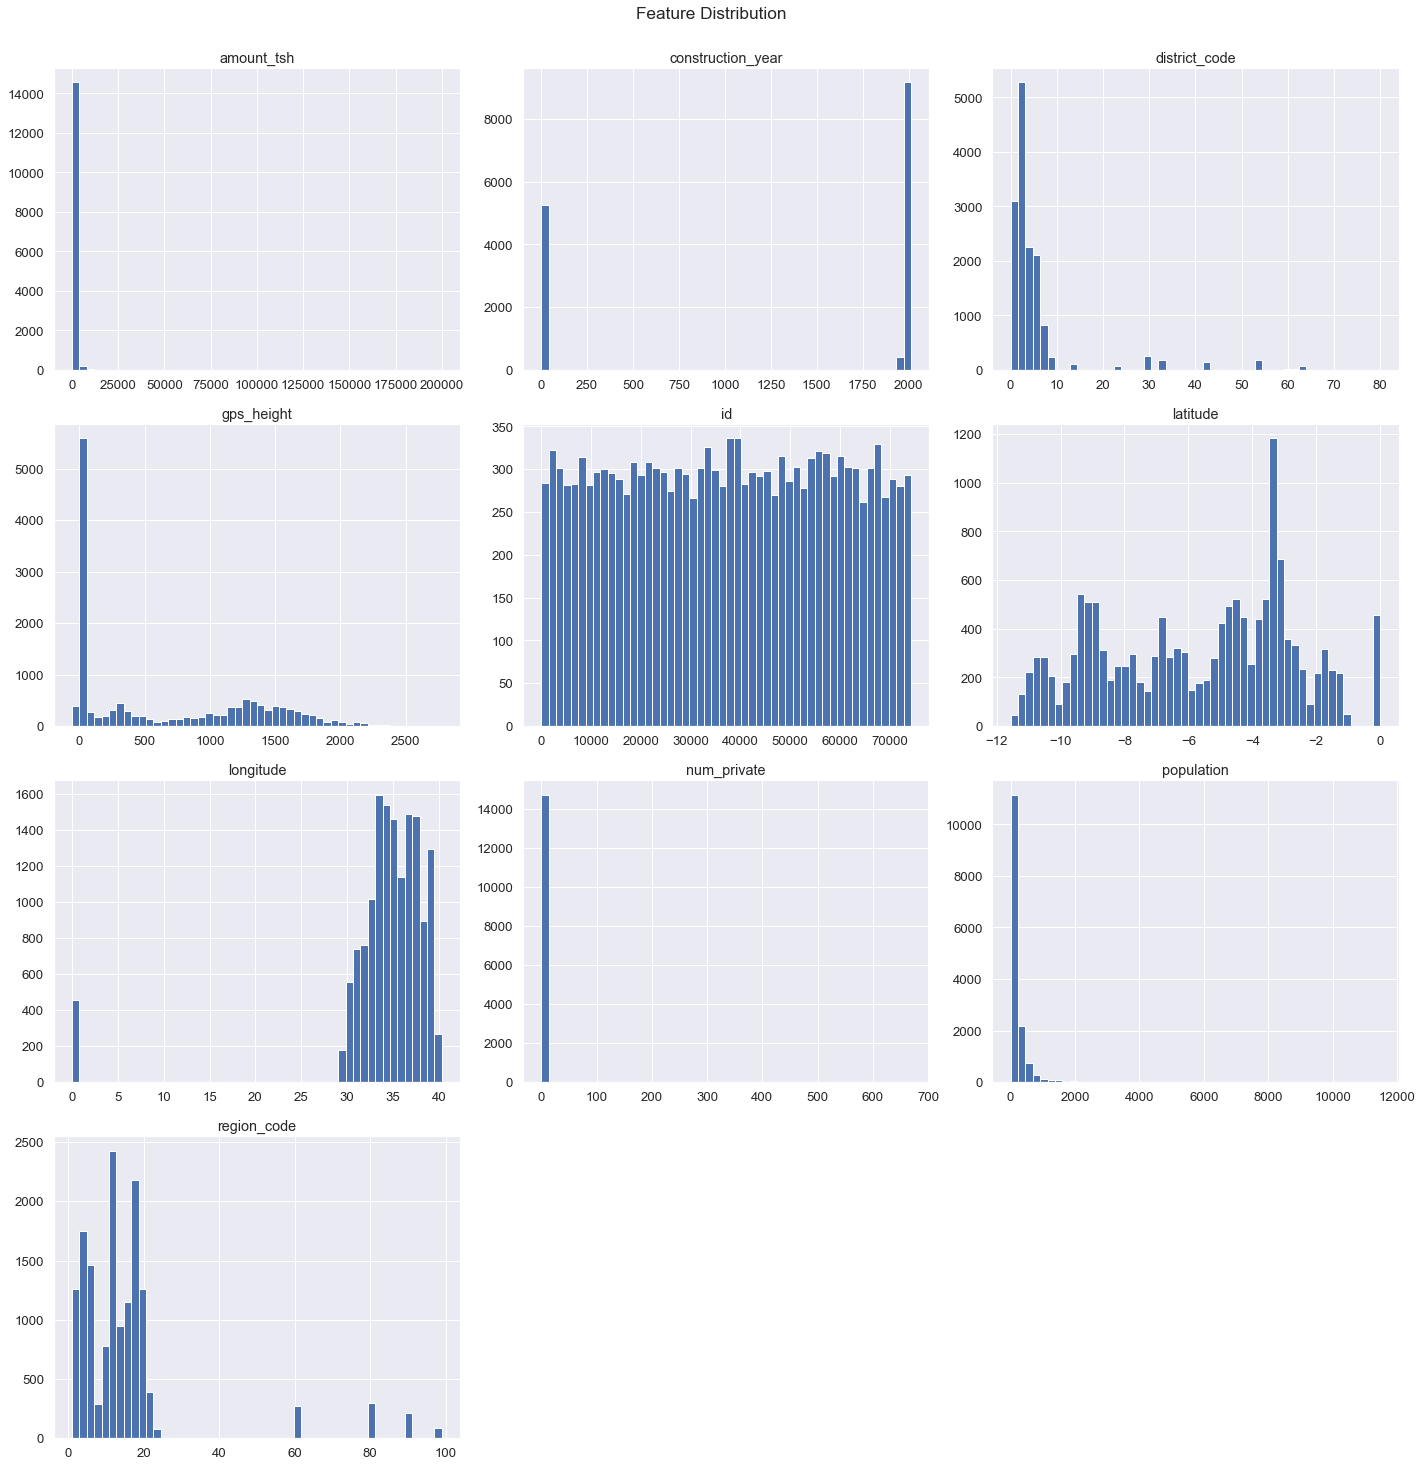

In [7]:
df.hist(bins=50, figsize=(20,20))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

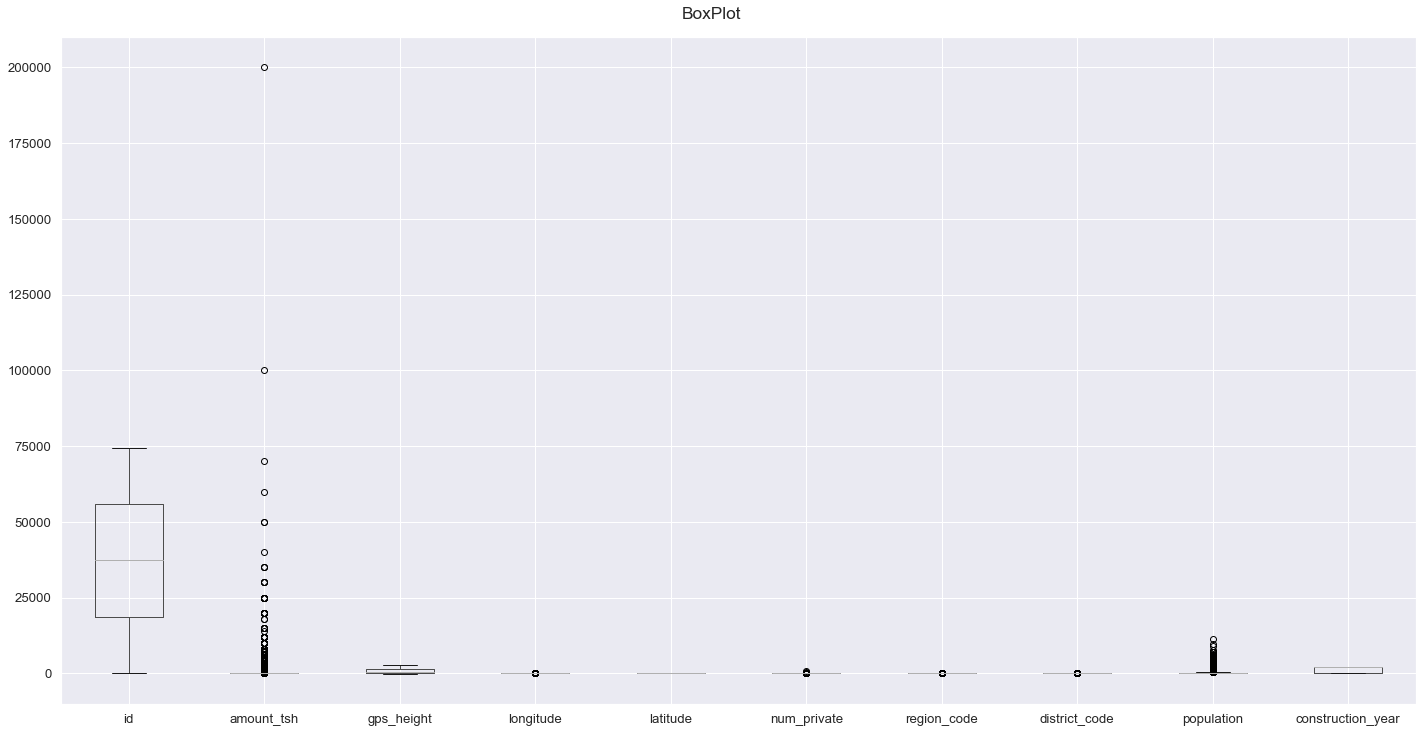

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Drop similarly and irrelevant columns

In [9]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group'], dtype='object')

In [10]:
df.drop(['id','date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude',
        'wpt_name', 'num_private','subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
        'recorded_by','scheme_name','extraction_type', 'extraction_type_group','management',
        'payment','water_quality','quantity','source', 'source_type','waterpoint_type'],axis=1,inplace=True)

In [11]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group
0,0.0,Internal,321,True,Parastatal,True,2012,other,parastatal,never pay,good,seasonal,surface,other
1,0.0,Pangani,300,True,VWC,True,2000,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe
2,0.0,Internal,500,True,VWC,NaN,2010,other,user-group,never pay,good,insufficient,surface,other
3,0.0,Ruvuma / Southern Coast,250,NaN,VWC,True,1987,other,user-group,unknown,good,dry,groundwater,other
4,500.0,Ruvuma / Southern Coast,60,NaN,Water Board,True,2000,gravity,user-group,monthly,good,enough,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,Wami / Ruvu,20,True,VWC,True,1988,motorpump,user-group,never pay,good,enough,surface,communal standpipe
14846,1000.0,Pangani,2960,True,VWC,False,1994,handpump,user-group,annually,salty,insufficient,groundwater,hand pump
14847,0.0,Internal,200,True,VWC,NaN,2010,gravity,user-group,never pay,good,insufficient,surface,communal standpipe
14848,0.0,Lake Nyasa,150,True,VWC,True,2009,gravity,user-group,never pay,good,insufficient,surface,communal standpipe


In [12]:
#Save to csv
#df.to_csv("test1.csv",index=False)

In [13]:
df["construction_year"] = df["construction_year"].replace(to_replace=0, value=np.nan)

In [14]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group
0,0.0,Internal,321,True,Parastatal,True,2012.0,other,parastatal,never pay,good,seasonal,surface,other
1,0.0,Pangani,300,True,VWC,True,2000.0,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe
2,0.0,Internal,500,True,VWC,NaN,2010.0,other,user-group,never pay,good,insufficient,surface,other
3,0.0,Ruvuma / Southern Coast,250,NaN,VWC,True,1987.0,other,user-group,unknown,good,dry,groundwater,other
4,500.0,Ruvuma / Southern Coast,60,NaN,Water Board,True,2000.0,gravity,user-group,monthly,good,enough,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,Wami / Ruvu,20,True,VWC,True,1988.0,motorpump,user-group,never pay,good,enough,surface,communal standpipe
14846,1000.0,Pangani,2960,True,VWC,False,1994.0,handpump,user-group,annually,salty,insufficient,groundwater,hand pump
14847,0.0,Internal,200,True,VWC,NaN,2010.0,gravity,user-group,never pay,good,insufficient,surface,communal standpipe
14848,0.0,Lake Nyasa,150,True,VWC,True,2009.0,gravity,user-group,never pay,good,insufficient,surface,communal standpipe


In [15]:
df['age'] = 2020 - df["construction_year"]

In [16]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,age
0,0.0,Internal,321,True,Parastatal,True,2012.0,other,parastatal,never pay,good,seasonal,surface,other,8.0
1,0.0,Pangani,300,True,VWC,True,2000.0,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,20.0
2,0.0,Internal,500,True,VWC,NaN,2010.0,other,user-group,never pay,good,insufficient,surface,other,10.0
3,0.0,Ruvuma / Southern Coast,250,NaN,VWC,True,1987.0,other,user-group,unknown,good,dry,groundwater,other,33.0
4,500.0,Ruvuma / Southern Coast,60,NaN,Water Board,True,2000.0,gravity,user-group,monthly,good,enough,groundwater,communal standpipe,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,Wami / Ruvu,20,True,VWC,True,1988.0,motorpump,user-group,never pay,good,enough,surface,communal standpipe,32.0
14846,1000.0,Pangani,2960,True,VWC,False,1994.0,handpump,user-group,annually,salty,insufficient,groundwater,hand pump,26.0
14847,0.0,Internal,200,True,VWC,NaN,2010.0,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,10.0
14848,0.0,Lake Nyasa,150,True,VWC,True,2009.0,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,11.0


In [17]:
df.drop(['construction_year'],axis=1,inplace=True)

In [18]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,age
0,0.0,Internal,321,True,Parastatal,True,other,parastatal,never pay,good,seasonal,surface,other,8.0
1,0.0,Pangani,300,True,VWC,True,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,20.0
2,0.0,Internal,500,True,VWC,NaN,other,user-group,never pay,good,insufficient,surface,other,10.0
3,0.0,Ruvuma / Southern Coast,250,NaN,VWC,True,other,user-group,unknown,good,dry,groundwater,other,33.0
4,500.0,Ruvuma / Southern Coast,60,NaN,Water Board,True,gravity,user-group,monthly,good,enough,groundwater,communal standpipe,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,Wami / Ruvu,20,True,VWC,True,motorpump,user-group,never pay,good,enough,surface,communal standpipe,32.0
14846,1000.0,Pangani,2960,True,VWC,False,handpump,user-group,annually,salty,insufficient,groundwater,hand pump,26.0
14847,0.0,Internal,200,True,VWC,NaN,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,10.0
14848,0.0,Lake Nyasa,150,True,VWC,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,11.0


In [19]:
#Save to csv
#df.to_csv("test2.csv",index=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   basin                  14850 non-null  object 
 2   population             14850 non-null  int64  
 3   public_meeting         14029 non-null  object 
 4   scheme_management      13881 non-null  object 
 5   permit                 14113 non-null  object 
 6   extraction_type_class  14850 non-null  object 
 7   management_group       14850 non-null  object 
 8   payment_type           14850 non-null  object 
 9   quality_group          14850 non-null  object 
 10  quantity_group         14850 non-null  object 
 11  source_class           14850 non-null  object 
 12  waterpoint_type_group  14850 non-null  object 
 13  age                    9590 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.6+

### Treat Missing Values

In [21]:
df.isnull().sum()

amount_tsh                  0
basin                       0
population                  0
public_meeting            821
scheme_management         969
permit                    737
extraction_type_class       0
management_group            0
payment_type                0
quality_group               0
quantity_group              0
source_class                0
waterpoint_type_group       0
age                      5260
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

amount_tsh               0
basin                    0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source_class             0
waterpoint_type_group    0
age                      0
dtype: int64

In [24]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,age
0,0.0,Internal,321,True,Parastatal,True,other,parastatal,never pay,good,seasonal,surface,other,8.0
1,0.0,Pangani,300,True,VWC,True,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,20.0
5,0.0,Pangani,200,True,VWC,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe,30.0
6,0.0,Rufiji,600,True,VWC,True,handpump,user-group,never pay,salty,enough,groundwater,hand pump,13.0
7,0.0,Ruvuma / Southern Coast,1,True,Water Board,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14843,0.0,Lake Tanganyika,1400,True,Water authority,False,other,user-group,never pay,good,enough,groundwater,other,25.0
14845,0.0,Wami / Ruvu,20,True,VWC,True,motorpump,user-group,never pay,good,enough,surface,communal standpipe,32.0
14846,1000.0,Pangani,2960,True,VWC,False,handpump,user-group,annually,salty,insufficient,groundwater,hand pump,26.0
14848,0.0,Lake Nyasa,150,True,VWC,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,11.0


In [25]:
df.reset_index(drop=True,inplace=True)

In [26]:
df

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,age
0,0.0,Internal,321,True,Parastatal,True,other,parastatal,never pay,good,seasonal,surface,other,8.0
1,0.0,Pangani,300,True,VWC,True,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,20.0
2,0.0,Pangani,200,True,VWC,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe,30.0
3,0.0,Rufiji,600,True,VWC,True,handpump,user-group,never pay,salty,enough,groundwater,hand pump,13.0
4,0.0,Ruvuma / Southern Coast,1,True,Water Board,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8068,0.0,Lake Tanganyika,1400,True,Water authority,False,other,user-group,never pay,good,enough,groundwater,other,25.0
8069,0.0,Wami / Ruvu,20,True,VWC,True,motorpump,user-group,never pay,good,enough,surface,communal standpipe,32.0
8070,1000.0,Pangani,2960,True,VWC,False,handpump,user-group,annually,salty,insufficient,groundwater,hand pump,26.0
8071,0.0,Lake Nyasa,150,True,VWC,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,11.0


In [27]:
#Save to csv
#df.to_csv("test3.csv",index=False)

### Correlation

In [28]:
df.corr()

,amount_tsh,population,age
amount_tsh,1.000000,0.007590,-0.012931
population,0.007590,1.000000,-0.030211
age,-0.012931,-0.030211,1.000000


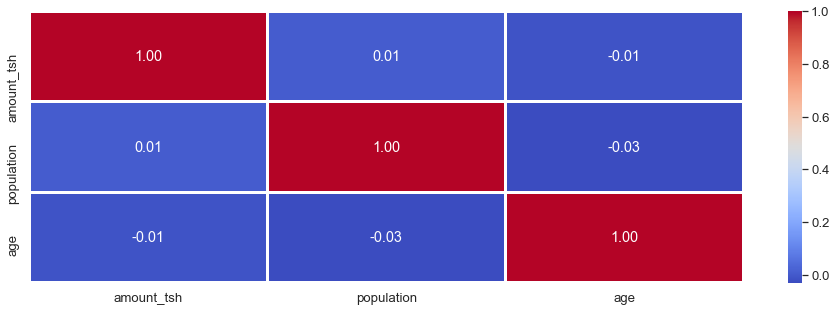

In [29]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

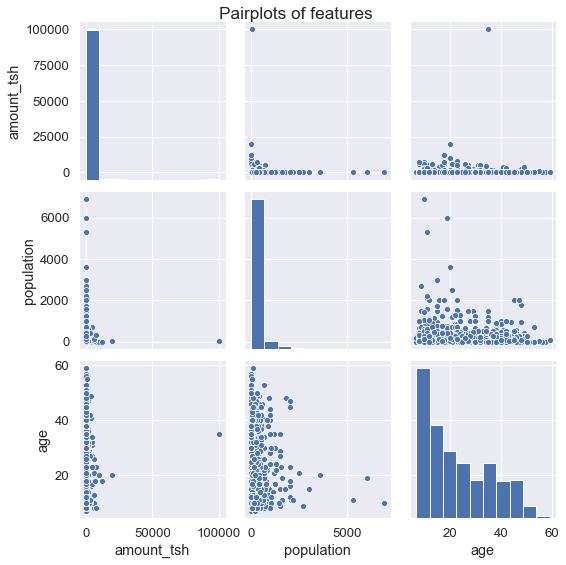

In [30]:
sns.pairplot(df[['amount_tsh','population','age']].sample(1000))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Treat Duplicate Values

In [31]:
df.duplicated(keep='first').sum()

1498

In [32]:
df[df.duplicated(keep=False)] #Check duplicate values

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,age
2,0.0,Pangani,200,True,VWC,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe,30.0
4,0.0,Ruvuma / Southern Coast,1,True,Water Board,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,38.0
6,0.0,Pangani,1,True,Water Board,True,gravity,user-group,monthly,good,enough,groundwater,communal standpipe,17.0
7,5.0,Pangani,75,True,Water Board,True,gravity,user-group,per bucket,good,enough,groundwater,communal standpipe,14.0
8,1000.0,Rufiji,1,True,VWC,True,gravity,user-group,monthly,good,enough,groundwater,communal standpipe,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,5.0,Pangani,45,True,Water Board,True,gravity,user-group,per bucket,good,enough,surface,communal standpipe,13.0
8061,1000.0,Lake Nyasa,0,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,17.0
8062,0.0,Rufiji,40,True,VWC,False,handpump,user-group,never pay,good,enough,groundwater,hand pump,11.0
8064,3000.0,Lake Nyasa,0,True,VWC,False,gravity,user-group,annually,good,enough,groundwater,communal standpipe,34.0


### Treat Outliers

In [33]:
df.columns

Index(['amount_tsh', 'basin', 'population', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_class', 'waterpoint_type_group', 'age'], dtype='object')

In [34]:
df.describe()

,amount_tsh,population,age
count,8073.000000,8073.000000,8073.000000
mean,544.618296,265.841571,22.966060
std,3293.672667,554.746029,12.426148
min,0.000000,0.000000,7.000000
25%,0.000000,20.000000,12.000000
50%,0.000000,125.000000,19.000000
75%,250.000000,300.000000,33.000000
max,200000.000000,11469.000000,60.000000


In [35]:
windsorizer = Winsorizer(distribution='skewed',tail='right',fold=3.0, variables=['amount_tsh','population'])

In [36]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=3.0,
           variables=['amount_tsh', 'population'])

In [37]:
df2 = windsorizer.transform(df)

In [38]:
df2

,amount_tsh,basin,population,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,age
0,0.0,Internal,321.0,True,Parastatal,True,other,parastatal,never pay,good,seasonal,surface,other,8.0
1,0.0,Pangani,300.0,True,VWC,True,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,20.0
2,0.0,Pangani,200.0,True,VWC,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe,30.0
3,0.0,Rufiji,600.0,True,VWC,True,handpump,user-group,never pay,salty,enough,groundwater,hand pump,13.0
4,0.0,Ruvuma / Southern Coast,1.0,True,Water Board,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8068,0.0,Lake Tanganyika,1140.0,True,Water authority,False,other,user-group,never pay,good,enough,groundwater,other,25.0
8069,0.0,Wami / Ruvu,20.0,True,VWC,True,motorpump,user-group,never pay,good,enough,surface,communal standpipe,32.0
8070,1000.0,Pangani,1140.0,True,VWC,False,handpump,user-group,annually,salty,insufficient,groundwater,hand pump,26.0
8071,0.0,Lake Nyasa,150.0,True,VWC,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,11.0


In [39]:
df2.describe()

,amount_tsh,population,age
count,8073.000000,8073.000000,8073.000000
mean,196.662145,218.979066,22.966060
std,339.750561,272.294408,12.426148
min,0.000000,0.000000,7.000000
25%,0.000000,20.000000,12.000000
50%,0.000000,125.000000,19.000000
75%,250.000000,300.000000,33.000000
max,1000.000000,1140.000000,60.000000


In [40]:
windsorizer.left_tail_caps_

{}

In [41]:
windsorizer.right_tail_caps_

{'amount_tsh': 1000.0, 'population': 1140.0}

In [42]:
#Save to csv
#df2.to_csv("test4.csv",index=False)

In [43]:
df2.columns

Index(['amount_tsh', 'basin', 'population', 'public_meeting', 'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_class', 'waterpoint_type_group', 'age'], dtype='object')

In [46]:
#Rearrange columns
df2 = df2[['amount_tsh','age','population','basin','public_meeting', 'scheme_management', 'permit', 
           'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 
           'source_class', 'waterpoint_type_group']]

In [47]:
df2

,amount_tsh,age,population,basin,public_meeting,scheme_management,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group
0,0.0,8.0,321.0,Internal,True,Parastatal,True,other,parastatal,never pay,good,seasonal,surface,other
1,0.0,20.0,300.0,Pangani,True,VWC,True,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe
2,0.0,30.0,200.0,Pangani,True,VWC,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe
3,0.0,13.0,600.0,Rufiji,True,VWC,True,handpump,user-group,never pay,salty,enough,groundwater,hand pump
4,0.0,38.0,1.0,Ruvuma / Southern Coast,True,Water Board,True,submersible,user-group,never pay,good,dry,groundwater,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8068,0.0,25.0,1140.0,Lake Tanganyika,True,Water authority,False,other,user-group,never pay,good,enough,groundwater,other
8069,0.0,32.0,20.0,Wami / Ruvu,True,VWC,True,motorpump,user-group,never pay,good,enough,surface,communal standpipe
8070,1000.0,26.0,1140.0,Pangani,True,VWC,False,handpump,user-group,annually,salty,insufficient,groundwater,hand pump
8071,0.0,11.0,150.0,Lake Nyasa,True,VWC,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe


### Perform One-Hot Encoding

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8073 entries, 0 to 8072
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             8073 non-null   float64
 1   age                    8073 non-null   float64
 2   population             8073 non-null   float64
 3   basin                  8073 non-null   object 
 4   public_meeting         8073 non-null   object 
 5   scheme_management      8073 non-null   object 
 6   permit                 8073 non-null   object 
 7   extraction_type_class  8073 non-null   object 
 8   management_group       8073 non-null   object 
 9   payment_type           8073 non-null   object 
 10  quality_group          8073 non-null   object 
 11  quantity_group         8073 non-null   object 
 12  source_class           8073 non-null   object 
 13  waterpoint_type_group  8073 non-null   object 
dtypes: float64(3), object(11)
memory usage: 883.1+ KB


In [49]:
df3 = pd.get_dummies(df2,drop_first=True)

In [50]:
df3

,amount_tsh,age,population,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0.0,8.0,321.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,0.0,20.0,300.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0.0,30.0,200.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,13.0,600.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.0,38.0,1.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8068,0.0,25.0,1140.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8069,0.0,32.0,20.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
8070,1000.0,26.0,1140.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
8071,0.0,11.0,150.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [51]:
df3.columns

Index(['amount_tsh', 'age', 'population', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'public_meeting_True', 'scheme_management_Other', 'scheme_management_Parastatal', 'scheme_management_Private operator', 'scheme_management_SWC', 'scheme_management_Trust', 'scheme_management_VWC', 'scheme_management_WUA', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_Water authority', 'permit_True', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 'extraction_type_class_other', 'extraction_type_class_rope pump', 'extraction_type_class_submersible', 'extraction_type_class_wind-powered', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'payment_type_monthly', 'payment_type_never pay', 'payment_type_on failure', 'payment_type_other',
       'payment_type_per b

In [53]:
#Save to csv
#df3.to_csv("test5.csv",index=False)